In [5]:
using Pkg
Pkg.activate(@__DIR__)
using DecisionMakingProblems
using POMDPs
using QuickPOMDPs
using POMDPModelTools
using MCTS
using POMDPSimulators
using POMDPPolicies
using BenchmarkTools
using Plots
using Statistics

  Activating

 project at `e:\Dropbox (Personal)\Misc. Programs\Julia Code Testing\MCTSExperiments\examples`


In [6]:
twenty_forty_eight_config = DecisionMakingProblems.TwentyFortyEight(;γ=0.99)

twenty_forty_eight = QuickMDP(
    gen = function(s, a, rng)
        sp, r = DecisionMakingProblems.transition_and_reward(twenty_forty_eight_config, s, a)
        return (sp=sp, r=r)
    end,
    actions = [
        DecisionMakingProblems.UP,
        DecisionMakingProblems.RIGHT, 
        DecisionMakingProblems.DOWN, 
        DecisionMakingProblems.LEFT
    ],
    discount=0.99,
    initialstate = ImplicitDistribution(rng->DecisionMakingProblems.initial_board()),
    isterminal = s -> DecisionMakingProblems.isdone(s),
    statetype=UInt64
);

In [7]:
solver = MCTSSolver(n_iterations=100, depth=10, exploration_constant=5.0)
planner = solve(solver, twenty_forty_eight);

In [8]:
init = DecisionMakingProblems.initial_board()

0x1100000000000000

In [9]:
simulator = RolloutSimulator()

RolloutSimulator{Random._GLOBAL_RNG}(Random._GLOBAL_RNG(), nothing, nothing)

In [10]:
rollouts_zach = [ simulate(simulator, twenty_forty_eight, planner, init) for _ in 1:100 ]

100-element Vector{Float64}:
 1368.398073585057
 1484.0767537235156
 1392.8058873496504
 1488.7873563886753
 1412.9791970059157
 1403.1027218544748
 1403.839644506868
 1440.7442145252796
 1401.7927645878904
 1418.2433413210927
    ⋮
 1510.0002563607652
 1348.5981410421534
 1386.0982137814947
 1386.2776169849667
 1381.8300566483933
 1426.1652841086975
 1441.9075527085301
 1387.6857728124623
 1422.122109074008

In [11]:
print("$(mean(rollouts_zach)) ± $(std(rollouts_zach))")

1411.2611375857753 ± 42.39753394296333

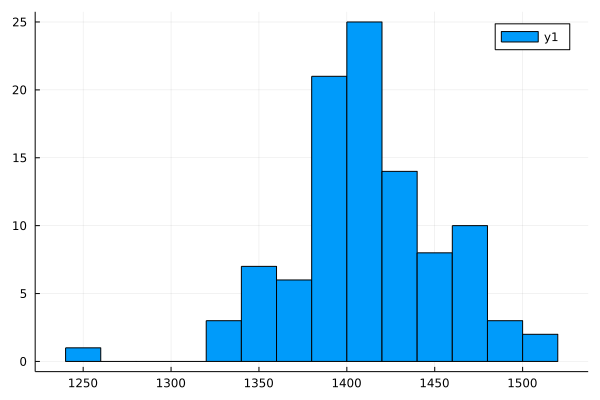

In [12]:
histogram(rollouts_zach)

In [13]:
@benchmark action(planner, init)

In [ ]:
@benchmark simulate(RolloutSimulator(), twenty_forty_eight, planner, init)